# Analysing factors that affect Typing Speed

In [1]:
# Necessary modules for data cleaning and data visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading our data

df = pd.read_csv("datasets/typing-speeds-project/typing-speeds.csv")

In [3]:
# Let's familiarize ourselves with the columns

df.columns

Index(['PARTICIPANT_ID', 'AGE', 'HAS_TAKEN_TYPING_COURSE', 'COUNTRY', 'LAYOUT',
       'NATIVE_LANGUAGE', 'FINGERS', 'KEYBOARD_TYPE', 'ERROR_RATE',
       'AVG_WPM_15', 'ROR'],
      dtype='object')

In [4]:
# What type of data are we dealing with in this dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168594 entries, 0 to 168593
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PARTICIPANT_ID           168594 non-null  int64  
 1   AGE                      168594 non-null  int64  
 2   HAS_TAKEN_TYPING_COURSE  168594 non-null  int64  
 3   COUNTRY                  168574 non-null  object 
 4   LAYOUT                   168594 non-null  object 
 5   NATIVE_LANGUAGE          168594 non-null  object 
 6   FINGERS                  168594 non-null  object 
 7   KEYBOARD_TYPE            168594 non-null  object 
 8   ERROR_RATE               168594 non-null  float64
 9   AVG_WPM_15               168594 non-null  float64
 10  ROR                      168594 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 14.1+ MB


### Questions

In [5]:
# Do participants who have taken a typing course have a higher average WPM/error rate compared to those who have not

wpm_error_df = df[["HAS_TAKEN_TYPING_COURSE","AVG_WPM_15", "ERROR_RATE"]]

# Grouping by those who have taken the course and those who have not
course_df = wpm_error_df.groupby("HAS_TAKEN_TYPING_COURSE")[['AVG_WPM_15', 'ERROR_RATE']].mean().reset_index()

err_rate_of_typists = course_df.loc[1].iloc[2]
err_rate_of_non_typists = course_df.loc[0].iloc[2]

wpm_of_typists = course_df.loc[1].iloc[1]
wpm_of_non_typists = course_df.loc[0].iloc[1]


# Narration
print(f"Those who took the typing course had an error rate of {err_rate_of_typists.round(4)} and a typing speed "
      f"of {wpm_of_typists.round(4)}")
print(f"Those who did not take the typing course had an error rate of {err_rate_of_non_typists.round(4)} "
      f"and a typing speed of {wpm_of_non_typists.round(4)}")

Those who took the typing course had an error rate of 1.0211 and a typing speed of 54.3499
Those who did not take the typing course had an error rate of 1.2314 and a typing speed of 49.0081


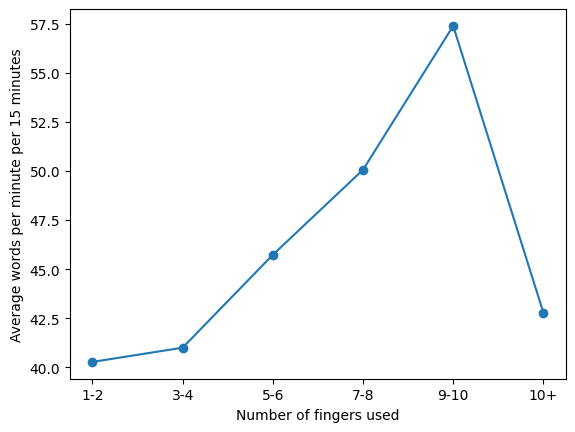

In [6]:
# Fingers vs Speed. Does using more fingers affect typing speed?

finger_speed = df[["FINGERS", "AVG_WPM_15"]]
finger_speed_sorted = finger_speed.groupby("FINGERS")["AVG_WPM_15"].mean().sort_index()

i = finger_speed_sorted.copy()
idx = i.index.tolist()
idx.append(idx.pop(1))
i = i.loc[idx]

plt.figure()
plt.plot(
      i.index,
      i.values,
      marker="o"
)

plt.xlabel("Number of fingers used")
plt.ylabel("Average words per minute per 15 minutes")
plt.show()

### It is clear that you get higher speeds with more fingers, and obviously, if you use more than 10 fingers, you're screwed

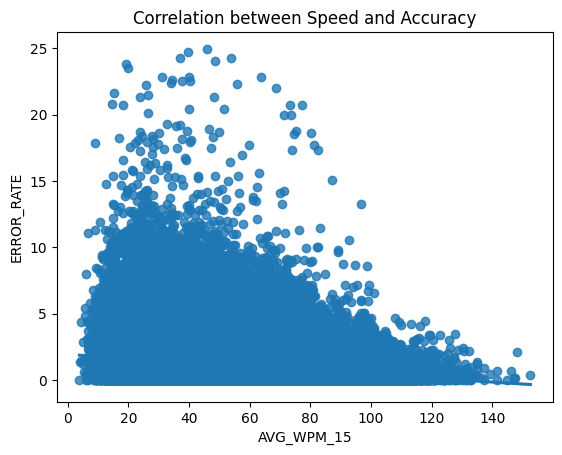

In [7]:
# Is there any form of correlation between speed and accuracy
# AVG_WPM_15 vs ERROR_RATE

sns.regplot(x="AVG_WPM_15", y="ERROR_RATE", data=df)
plt.title("Correlation between Speed and Accuracy")
plt.show()

### There is less error with higher speeds

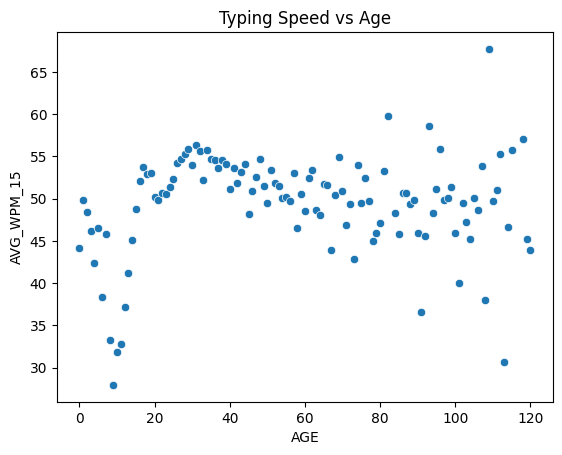

In [12]:
# Age vs Speed

age_speed = df[["AGE", "AVG_WPM_15"]]
age_speed_sorted = age_speed.groupby("AGE")["AVG_WPM_15"].mean().sort_index()
age_speed_sorted = pd.DataFrame(age_speed_sorted)
sns.scatterplot(y="AVG_WPM_15", x="AGE", data=age_speed_sorted)
plt.title("Typing Speed vs Age")
plt.show()


### When it comes to typing speed, age is just a number, skill and practice matter the most

In [28]:
# Which country has the highest average speed

country_speed = df[["COUNTRY", "AVG_WPM_15"]]

highest_speed = float(country_speed["AVG_WPM_15"].max())

target_row = country_speed[country_speed["AVG_WPM_15"] == highest_speed]

z = target_row.iloc[0].astype("string")
target_country = z.iloc[0]
print(f"The country with the highest average words per minute is {target_country}")

The country with the highest average words per minute is US


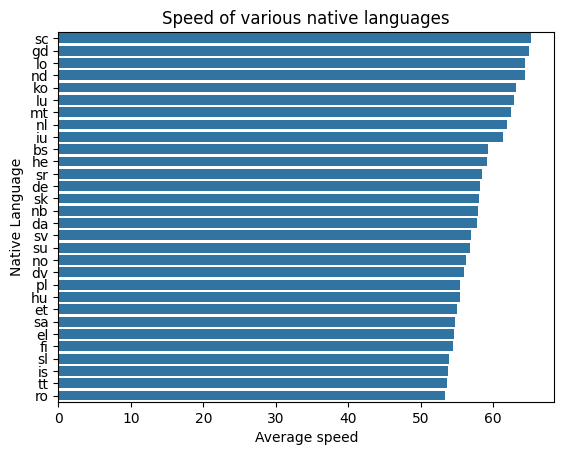

In [29]:
# Does native language affect typing speed 
lang_speed = df[["NATIVE_LANGUAGE", "AVG_WPM_15"]]
lang_speed_sorted = lang_speed.groupby("NATIVE_LANGUAGE")["AVG_WPM_15"].mean().sort_index()
lang_speed_sorted = pd.DataFrame(lang_speed_sorted)
top30 = lang_speed_sorted.nlargest(30, "AVG_WPM_15")

sns.barplot(data=top30,
            x="AVG_WPM_15",
            y="NATIVE_LANGUAGE")
plt.xlabel("Average speed")
plt.ylabel("Native Language")
plt.title("Speed of various native languages")
plt.show()